# Daten Einlesen

## Basics (Pandas + Matplotlib)

### Plotten

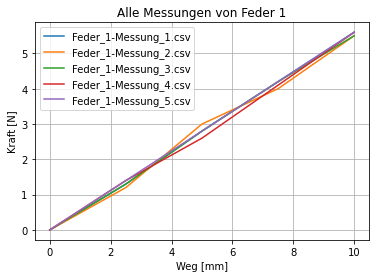

In [4]:
import pandas as pd
import glob # Zur Bestimmung der Liste an Dateien nach Suchschema
from matplotlib import pyplot as plt

Files_Feder1 = glob.glob("Feder_1-Messung*.csv")

plt.xlabel("Weg [mm]")
plt.ylabel("Kraft [N]")
plt.grid()

plt.title("Alle Messungen von Feder 1")
for filename in Files_Feder1:

    # Daten einlesen
    df = pd.read_csv(filename, index_col=None, header=0)

    # plotten
    plt.plot(df["Weg (mm)"], df["Kraft (N)"], label=filename) 


plt.legend() # muss nach plot kommen
plt.savefig('03-Feder1_Alle-Messungen.png', bbox_inches='tight', dpi=200)


### Was ist ein Pandas Dataframe?

- Indexierung startet bei 0
- Vorteil des Pandas DataFrame kommt zum tragen, wenn alle Daten in einem DataFrame vereinigt sind und über Kategorien getrennt werden

Oft wird als Name für Dataframes `df` verwendet, es geht aber natuerlich auch jeder andere Name

Zur Darstellung gibt es verschiedene Möglichkeiten (Hier Beispielhaft mit dem Dataframe mit dem Namen `df`)

-  `df` gesamten Dataframe anzeigen
-  `df.head()` ersten 5 Datenpunkte anzeigen (5 ist Standardwert)
-  `df.head(10)` ersten 10 Datenpunkte anzeigen
-  `df.tail()` letzten 5 Datenpunkte anzeigen (5 ist Standardwert)
-  `df.tail(10)` letzten 10 Datenpunkte anzeigen
-  `df.describe()` Zusammenfassung für jede Spalte (Anzahl, Mittelwert, usw.)
-  `df.info()` Zeigt Datentypen und Anzahl der Werte je Spalten an

In [5]:
df

,Weg (mm),Kraft (N)
0,0.0,0.0
1,2.5,1.4
2,5.0,2.8
3,7.5,4.2
4,10.0,5.6


In [6]:
df.head()

,Weg (mm),Kraft (N)
0,0.0,0.0
1,2.5,1.4
2,5.0,2.8
3,7.5,4.2
4,10.0,5.6


In [7]:
df.describe()

,Weg (mm),Kraft (N)
count,5.000000,5.000000
mean,5.000000,2.800000
std,3.952847,2.213594
min,0.000000,0.000000
25%,2.500000,1.400000
50%,5.000000,2.800000
75%,7.500000,4.200000
max,10.000000,5.600000


### Mehrere Messungen mit `Matplotlib` plotten

- wollen wir nun von 3 verschiedenen Federn jeweils 5 Messungen plotten so wird der Code schon recht lang und bezüglich der Beschriftung muss auch etwas getricks werden

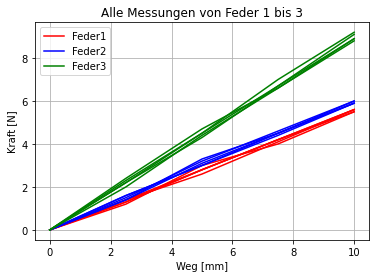

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import glob # Zur Bestimmung der Liste an Dateien nach Suchschema


plt.xlabel("Weg [mm]")
plt.ylabel("Kraft [N]")
plt.grid()

plt.title("Alle Messungen von Feder 1 bis 3")

# Messung 1
Files_Feder1 = glob.glob("Feder_1-Messung*.csv")
Messung=0 # Laufvariable um zu prüfen was die erste Messung ist (Für Labelabfrage)
label="Feder1" 
color="r"
for filename in Files_Feder1:
    Messung  = Messung + 1

    # Daten einlesen
    df = pd.read_csv(filename, index_col=None, header=0)

    # plotten
    if Messung == 1:
        plt.plot(df["Weg (mm)"], df["Kraft (N)"], label=label, c=color) 
    else:
        plt.plot(df["Weg (mm)"], df["Kraft (N)"], label='', c=color) 

# Messung 2
Files_Feder1 = glob.glob("Feder_2-Messung*.csv")
Messung=0 # Laufvariable um zu prüfen was die erste Messung ist (Für Labelabfrage)
label="Feder2" 
color="b"
for filename in Files_Feder1:
    Messung  = Messung + 1

    # Daten einlesen
    df = pd.read_csv(filename, index_col=None, header=0)

    # plotten
    if Messung == 1:
        plt.plot(df["Weg (mm)"], df["Kraft (N)"], label=label, c=color) 
    else:
        plt.plot(df["Weg (mm)"], df["Kraft (N)"], label='', c=color) 

# Messung 3
Files_Feder1 = glob.glob("Feder_3-Messung*.csv")
Messung=0 # Laufvariable um zu prüfen was die erste Messung ist (Für Labelabfrage)
label="Feder3" 
color="g"
for filename in Files_Feder1:
    Messung  = Messung + 1

    # Daten einlesen
    df = pd.read_csv(filename, index_col=None, header=0)

    # plotten
    if Messung == 1:
        plt.plot(df["Weg (mm)"], df["Kraft (N)"], label=label, c=color) 
    else:
        plt.plot(df["Weg (mm)"], df["Kraft (N)"], label='', c=color) 



plt.legend() # muss nach plot kommen
plt.savefig('03-Feder1bis3_Alle-Messungen_Matplotlib.png', bbox_inches='tight', dpi=200)


### Alle Messungen einlesen in einem DataFrame überführen (Parameter aus Dateinamen auslesen)

- Wir wollen nun schauen wie wir mit nur wenigen Zeilen Code viel effektiver mit der Bibliothek `seaborn` plotten können
- Bisher haben jetzt für **jede Messung einen eigenen DataFrame** erstellt. 
- Damit wir jedoch den **DataFrame effektiv nutzen** können, müssen wir **alle Messungen in einen DataFrame** zusammenführen.

In [9]:
import pandas as pd
import glob # Zur Bestimmung der Liste an Dateien nach Suchschema

all_files = glob.glob("Feder*-Messung*.csv") # Liste aller Dateien die eingelesen werden sollen

li = [] # dummy array um Dataframes zu sammeln

# Funktion die Parameter aus Dateinamen liest 
def get_file_parameter(filename,start_indicator,end_indicator):
    start = filename.find(start_indicator) + len(start_indicator)
    end = filename.find(end_indicator)
    substring = filename[start:end]
    return substring

for filename in all_files:

    # Datei einlesen
    df = pd.read_csv(filename, index_col=None, header=0)

    # Feder aus Namen lesen
    Feder = get_file_parameter(filename,"Feder_","-")
    df['Feder'] = Feder

    # Messnummer aus Namen lesen
    Messung = get_file_parameter(filename,"Messung_",".csv")
    df['Messung'] = Messung

    # Dataframes anfügen
    li.append(df)

# Dataframe zusammenführen
Messungen = pd.concat(li, axis=0, ignore_index=True)

In [10]:
Messungen.describe()

,Weg (mm),Kraft (N)
count,75.000000,75.000000
mean,5.000000,3.418667
std,3.559342,2.609478
min,0.000000,0.000000
25%,2.500000,1.400000
50%,5.000000,3.100000
75%,7.500000,5.500000
max,10.000000,9.200000


In [11]:
Messungen

,Weg (mm),Kraft (N),Feder,Messung
0,0.0,0.0,1,1
1,2.5,1.3,1,1
2,5.0,2.8,1,1
3,7.5,4.2,1,1
4,10.0,5.6,1,1
...,...,...,...,...
70,0.0,0.0,3,5
71,2.5,2.3,3,5
72,5.0,4.5,3,5
73,7.5,7.0,3,5


### Plotten des neuen DataFrames mit `Seaborn`

- Zunächst wollen wir eine ähnliche Grafik wie vorhin erzeugen

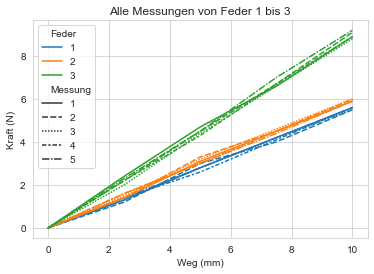

In [12]:
import seaborn as sns

sns.set_style("whitegrid")
sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder", style="Messung", palette="tab10")

# da Seaborn auf Matplotlib aufbaut können diese Befehle weiterhin verwendet werden
plt.title("Alle Messungen von Feder 1 bis 3") 
plt.savefig('03-Feder1bis3_Alle-Messungen_Seaborn_whitegrid.png', bbox_inches='tight', dpi=200)


- Man beachte die Anzahl an Codezeilen die notwendig waren um eine ähnliche Grafik zu erzeugen. 
- Weiterhin werden Beschriftungen aus Achsen und Legenden aus dem Dataframe übernommen

Als nächstes werden wir den Lineplot so verwenden, wie er standardmäßig von Seaborn erstellt wird. Dabei wird der Mittelwert über alle Messungen (jeweils für jede Feder) ermittelt und das mittels `Bootstrapping` ermittelte Konfidenzintervall (default sind 95%) geplottet

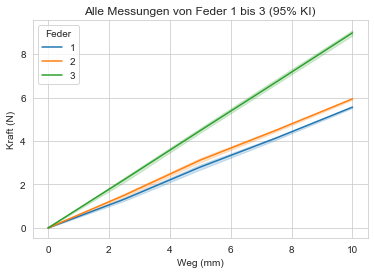

In [13]:
import seaborn as sns

sns.set_style("whitegrid")
sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder", palette="tab10")

# da Seaborn auf Matplotlib aufbaut können diese Befehle weiterhin verwendet werden
plt.title("Alle Messungen von Feder 1 bis 3 (95% KI)") 
plt.savefig('03-Feder1bis3_Alle-Messungen_Seaborn_ci.png', bbox_inches='tight', dpi=200)


Das Konfidenzintervall kann mit dem Parameter `ci` eingestellt werden. Mit `ci=sd` wird die Standardabweichung geplottet 

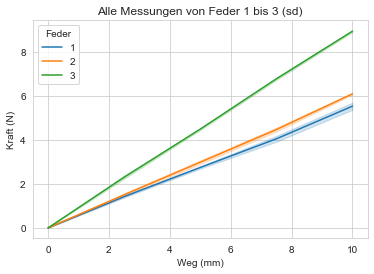

In [40]:
import seaborn as sns

sns.set_style("whitegrid")
sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder", ci="sd")

# da Seaborn auf Matplotlib aufbaut können diese Befehle weiterhin verwendet werden
plt.title("Alle Messungen von Feder 1 bis 3 (sd)") 
plt.savefig('03-Feder1bis3_Alle-Messungen_Seaborn_sd.png', bbox_inches='tight', dpi=200)

Mit `setstyle` können verschiedene vordefinierte Stile verwendet werden
- `darkgrid`, `whitegrid`, `dark`, `white`, `ticks` 


Nachfolgend mit `darkgrid`

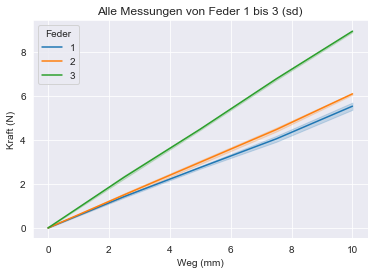

In [41]:
import seaborn as sns

sns.set_style("darkgrid")
sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder", ci="sd")

# da Seaborn auf Matplotlib aufbaut können diese Befehle weiterhin verwendet werden
plt.title("Alle Messungen von Feder 1 bis 3 (sd)") 
plt.savefig('03-Feder1bis3_Alle-Messungen_Seaborn_sd_darkgrid.png', bbox_inches='tight', dpi=200)

`white`

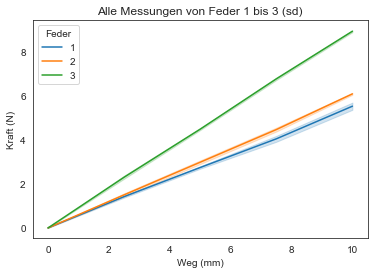

In [42]:
import seaborn as sns

sns.set_style("white")
sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder", ci="sd")

# da Seaborn auf Matplotlib aufbaut können diese Befehle weiterhin verwendet werden
plt.title("Alle Messungen von Feder 1 bis 3 (sd)") 
plt.savefig('03-Feder1bis3_Alle-Messungen_Seaborn_sd_white.png', bbox_inches='tight', dpi=200)

`dark`

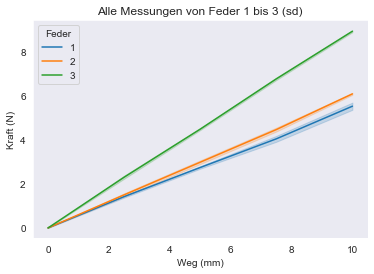

In [43]:
import seaborn as sns

sns.set_style("dark")
sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder", ci="sd")

# da Seaborn auf Matplotlib aufbaut können diese Befehle weiterhin verwendet werden
plt.title("Alle Messungen von Feder 1 bis 3 (sd)") 
plt.savefig('03-Feder1bis3_Alle-Messungen_Seaborn_sd_dark.png', bbox_inches='tight', dpi=200)

`ticks`

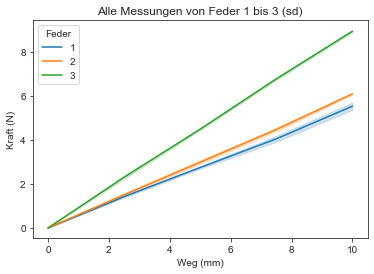

In [46]:
import seaborn as sns

sns.set_style("ticks")
sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder", ci="sd")

# da Seaborn auf Matplotlib aufbaut können diese Befehle weiterhin verwendet werden
plt.title("Alle Messungen von Feder 1 bis 3 (sd)") 
plt.savefig('03-Feder1bis3_Alle-Messungen_Seaborn_sd_ticks.png', bbox_inches='tight', dpi=200)

Ein riesen Vorteil an der Verwendung von Seaborn ist, dass die Standardeinstellungen sehr oft bereits sehr gut aussehende Grafiken erzeugen und somit mit sehr wenig Zeilen code gearbeitet werden kann.

Neben den Anpassungen des Aussehens über `set_style` kann auch die Größe der Schrift über `set_context` definiert werden, dabei gibt es folgende Möglichkeiten
- `paper` (Schrift klein)
- `notebook` (Schrift normal) (**default**)
- `talk` (Schrift groß)
- `poster` (Schrift sehr groß)

`paper`

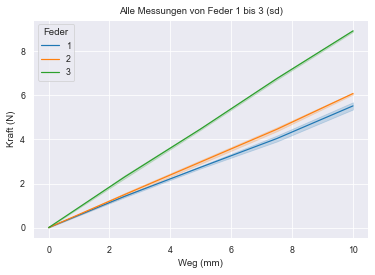

In [47]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("paper")

sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder", ci="sd")

# da Seaborn auf Matplotlib aufbaut können diese Befehle weiterhin verwendet werden
plt.title("Alle Messungen von Feder 1 bis 3 (sd)") 
plt.savefig('03-Feder1bis3_Alle-Messungen_Seaborn_sd_darkgrid_paper.png', bbox_inches='tight', dpi=200)

`talk`

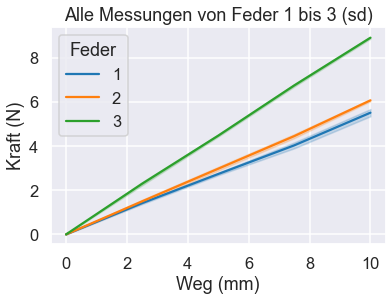

In [48]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("talk")

sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder", ci="sd")

# da Seaborn auf Matplotlib aufbaut können diese Befehle weiterhin verwendet werden
plt.title("Alle Messungen von Feder 1 bis 3 (sd)") 
plt.savefig('03-Feder1bis3_Alle-Messungen_Seaborn_sd_darkgrid_talk.png', bbox_inches='tight', dpi=200)

`poster`

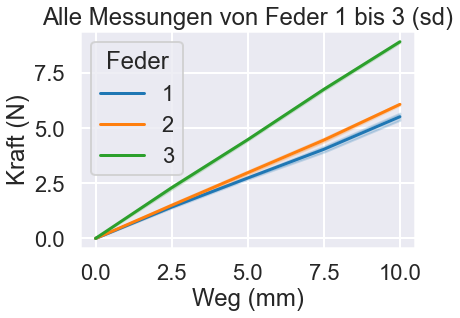

In [51]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("poster")

sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder", ci="sd")

# da Seaborn auf Matplotlib aufbaut können diese Befehle weiterhin verwendet werden
plt.title("Alle Messungen von Feder 1 bis 3 (sd)") 
plt.savefig('03-Feder1bis3_Alle-Messungen_Seaborn_sd_darkgrid_talk.png', bbox_inches='tight', dpi=200)

## Zusätzliche `Seaborn` plots mit weiteren Parametern

Um die Funktionen von Seaborn weiter zu verdeutlichen wurden zusätzliche Parameter in unser virtuelles Experiment eingefügt:

- Es werden nun 3 Federn jeweils 25 mal gemessen
- Dies wird jeweils von zwei verschiedenen Personen durchgeführt (Clara und Peter)
- Jeder Person nutzt jeweils zwei verschiedene Kraftmessdosen

### Messdaten automatisiert einlesen mit Kategorien

In [1]:
import pandas as pd
import glob # Zur Bestimmung der Liste an Dateien nach Suchschema

all_files = glob.glob("Big_Feder*-Messung*.csv") # Liste aller Dateien die eingelesen werden sollen

li = [] # dummy array um Dataframes zu sammeln

# Funktion die Parameter aus Dateinamen liest 
def get_file_parameter(filename,start_indicator,end_indicator):
    start = filename.find(start_indicator) + len(start_indicator)
    end = filename.find(end_indicator)
    substring = filename[start:end]
    return substring

for filename in all_files:

    # Datei einlesen
    df = pd.read_csv(filename, index_col=None, header=0)

    # Feder aus Namen lesen
    Feder = get_file_parameter(filename,"Big_Feder_","-")
    df['Feder'] = Feder

    # Person aus Namen lesen
    Person = get_file_parameter(filename,"Person_","-Messdose")
    df['Person'] = Person

    # Messdose aus Namen lesen
    Messdose = get_file_parameter(filename,"Messdose_","-Messung")
    df['Messdose'] = Messdose

    # Messnummer aus Namen lesen
    Messung = get_file_parameter(filename,"Messung_",".csv")
    df['Messung'] = Messung

    # Dataframes anfügen
    li.append(df)

# Dataframe zusammenführen
Messungen = pd.concat(li, axis=0, ignore_index=True)

Unser neuer Dataframe besitzt 1500 Reihen und 6 Spalten

In [3]:
# Messungen exportieren
Messungen.to_csv('Messungen_4Parameter.csv', index=None)

### Plotten Lineplot (Bootstrapping)

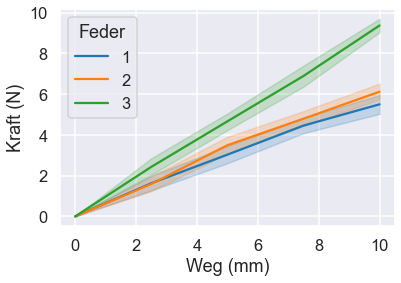

In [56]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("talk")

sns.lineplot(data=Messungen, x="Weg (mm)", y="Kraft (N)", hue="Feder")

plt.savefig('04-Big-Feder-Weg-Kraft.png', bbox_inches='tight', dpi=200)

### Plotten Lineplot mit FacetGrid

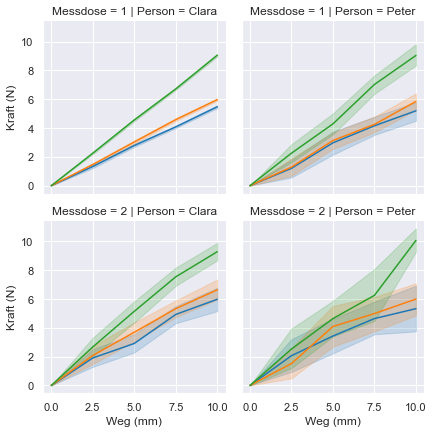

In [59]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook")

g = sns.FacetGrid(data=Messungen, col="Person",  row="Messdose", hue="Feder")
g.map_dataframe(sns.lineplot, x="Weg (mm)", y="Kraft (N)")
g.set_axis_labels("Weg (mm)", "Kraft (N)")

plt.savefig('04-Big-Feder-Weg-Kraft-FacetGrid.png', bbox_inches='tight', dpi=200)

### Maximalwerte aus Messkurven bestimmen

- Darstellung eines Wertes pro Messung besser als jede Kurve, daher wird hier nur der Maximalwert rausgezogen

In [61]:
MaxWerte = Messungen.groupby(['Feder','Person','Messdose','Messung']).agg({'Kraft (N)': ['max']}).reset_index()
MaxWerte.columns = ['Feder','Person','Messdose','Messung','Kraft_max (N)']
MaxWerte.describe()

,Kraft_max (N)
count,300.000000
mean,7.641333
std,2.289490
min,2.900000
25%,5.800000
50%,7.500000
75%,9.100000
max,19.100000


### Maximalwerte plotten (stripplot)

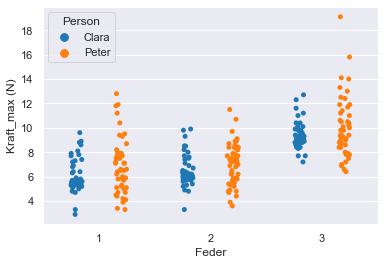

In [64]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook")

sns.stripplot(data=MaxWerte, x="Feder", y="Kraft_max (N)", hue="Person", dodge=True)

plt.savefig('04-Big-Feder-KraftMax-Strip-Personen.png', bbox_inches='tight', dpi=200)

### Maximalwerte plotten (catplot mit stripplot)

- Aufteilung mittels catplot

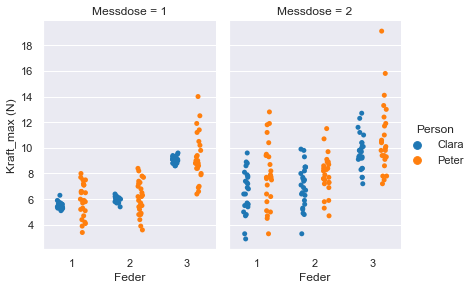

In [67]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook")

sns.catplot(x="Feder", y="Kraft_max (N)",
                hue="Person", col="Messdose",
                data=MaxWerte, kind="strip", dodge=True,
                height=4, aspect=.7); # dodge=True bewirkt das Daten nicht übereinander geplottet werden

plt.savefig('04-Big-Feder-KraftMax-CatPlot-Strip-Personen-Messdosen.png', bbox_inches='tight', dpi=200)


### Maximalwerte plotten (catplot mit boxplot)

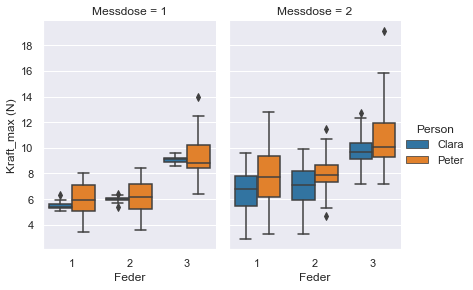

In [68]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook")

sns.catplot(x="Feder", y="Kraft_max (N)",
                hue="Person", col="Messdose",
                data=MaxWerte, kind="box",
                height=4, aspect=.7);

plt.savefig('04-Big-Feder-KraftMax-CatPlot-Box-Personen-Messdosen.png', bbox_inches='tight', dpi=200)

### Maximalwerte plotten (catplot mit bar plot)

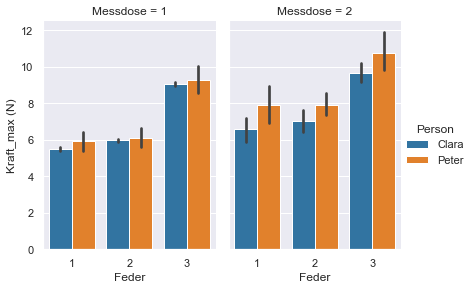

In [70]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook")

sns.catplot(x="Feder", y="Kraft_max (N)",
                hue="Person", col="Messdose",
                data=MaxWerte, kind="bar",
                height=4, aspect=.7);

plt.savefig('04-Big-Feder-KraftMax-CatPlot-Bar-Personen-Messdosen.png', bbox_inches='tight', dpi=200)

tauschen Messdose / Person

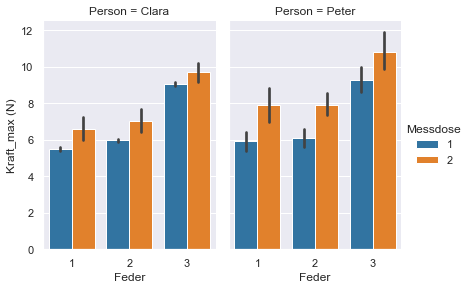

In [71]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook")

sns.catplot(x="Feder", y="Kraft_max (N)",
                hue="Messdose", col="Person",
                data=MaxWerte, kind="bar",
                height=4, aspect=.7);

plt.savefig('04-Big-Feder-KraftMax-CatPlot-Bar-Messdosen-Personen.png', bbox_inches='tight', dpi=200)

# Filtern (nur Clara und Messdose 1)

In [44]:
Clara_Messdose1 = MaxWerte[(MaxWerte["Person"] == "Clara") & (MaxWerte["Messdose"] == "1")]
Clara_Messdose1


,Feder,Person,Messdose,Messung,Kraft_max (N)
0,1,Clara,1,1,5.4
1,1,Clara,1,10,4.8
2,1,Clara,1,11,5.5
3,1,Clara,1,12,5.7
4,1,Clara,1,13,5.2
...,...,...,...,...,...
220,3,Clara,1,5,9.3
221,3,Clara,1,6,8.5
222,3,Clara,1,7,8.7
223,3,Clara,1,8,9.3


## Prüfen ob Filter richtig funktioniert mit `.unique()`

In [50]:
Clara_Messdose1["Person"].unique()

array(['Clara'], dtype=object)

In [51]:
Clara_Messdose1["Messdose"].unique()

array(['1'], dtype=object)

## `.unique()` für MaxWerte Dataframe anwenden

In [52]:
MaxWerte["Person"].unique()

array(['Clara', 'Peter'], dtype=object)